In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras

In [2]:
import pandas as pd
from pandas import pivot_table as pivot
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from keras import Sequential

Using TensorFlow backend.


In [3]:
rating_data = pd.read_csv('rating_data.csv')

In [4]:
rating_data

,userid,itemid,rating
0,c7a5a63d699234116541419ed4783f88,1,5
1,26faca5df2ab8179879a9a463e4b6809,10,5
2,0dab40af91895a702e443d2b72114c9a,13,4
3,04399b0442bf77e809a39a6d8cf82078,6,3
4,97a89e8bd7d5698e969d847e57c89b6b,18,2
...,...,...,...
603,fc3567d904f2d8034075b4c77fc973bf,9,4
604,5d236e3639f08eba204b523bdd617e6e,33,3
605,87a1d6397a4ba48f8b6e62ebf594cbe8,34,2
606,b839d4fed1deaea547089c3b113b6f95,28,1


In [5]:
unqieid = set(rating_data.userid)

In [6]:
unqieid=list(unqieid)

In [7]:
userindex = dict((word,unqieid.index(word)+1) for word in unqieid)

In [8]:
userindex

{'09c6716c3a99b4dca5438fbe2f3e6523': 1,
 '4da83357dd7a2807da00406fb75c3468': 2,
 '9c78aaf49af43e9e1ea4254d81357254': 3,
 '25fb45313dc36fc7ed8deda4c99861b7': 4,
 '961355d911d4dcf00273023318febb98': 5,
 '8ea41fc4ef32eebc802798b9622bf540': 6,
 'bba87340a93e451ed00f5ff820676ce1': 7,
 '91ebdb73d410bf952e4f1748756f46cf': 8,
 '437de12167b831cac1faeb0115a0f9fc': 9,
 'b19afe66d4bcdf1db839ed39a281987f': 10,
 'b7e7b9daba6269f8374fe9fc46da86bd': 11,
 'ebc6ed09d3db8d19ee38b64a5249cb32': 12,
 'cc65e854ccecb444736ebc1f402481c4': 13,
 'c4ade0ee3c46464f9fe8e7482b53df62': 14,
 '770af31798eb04adab8ecf0303462013': 15,
 '20b8cafcf9012139ac5db8a7628da63c': 16,
 '010a7f32eca345d38e23296e8e9d92a6': 17,
 'c244c6da67a47d27de4e38a1936575ae': 18,
 '9a28a1df546130e6b1962a22c3a790c7': 19,
 'fc3567d904f2d8034075b4c77fc973bf': 20,
 '90cc4e085543db1c8aad0e01fe9e4b9e': 21,
 'd77f51e1d3f35268f3d0cbbaf70eacd6': 22,
 'ad7fc388daca39f521be0c1e5dfadd6c': 23,
 '9d5cc915c24de6bf5380021aabf2848e': 24,
 '9615d5c5ed892eb7ee3816c

In [9]:
rating_data['userid'].replace(userindex,inplace=True)

In [10]:
rating_data

,userid,itemid,rating
0,148,1,5
1,143,10,5
2,47,13,4
3,84,6,3
4,131,18,2
...,...,...,...
603,20,9,4
604,145,33,3
605,26,34,2
606,57,28,1


In [11]:
from keras.constraints import non_neg

In [12]:

import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot

In [13]:
num_user = len(rating_data.userid.unique())
num_item = len(rating_data.itemid.unique())
n_latent_factor = 3
print('Number of user:',num_user)
print('Number of item:',num_item)

Number of user: 150
Number of item: 39


In [14]:
"Latent feature vector for movies"
item_input = keras.layers.Input(shape=[1],name='Item')
item_embedding = keras.layers.Embedding(num_item + 1, n_latent_factor, name='NonNegMovie-Embedding', embeddings_constraint=non_neg())(item_input)
item_vec = keras.layers.Flatten(name='FlattenMovies')(item_embedding)

"Latent feature vector for users"
user_input = keras.layers.Input(shape=[1],name='User')
user_embedding = keras.layers.Embedding(num_user+1,n_latent_factor,name='NonNegUser-Embedding',embeddings_constraint=non_neg())(user_input)
user_vec = keras.layers.Flatten(name='FlattenUsers')(user_embedding)

"Merge the user and movie latent vectors using dot product"
prod = keras.layers.dot([item_vec, user_vec],axes = (1,1),name='DotProduct')

"Build model and compile"
model_vanilla_MF = keras.Model([user_input, item_input], prod)

"Using Adam optimizer to backpropagate"
model_vanilla_MF.compile('adam', 'mean_squared_error')

In [15]:
model_vanilla_MF.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
NonNegMovie-Embedding (Embeddin (None, 1, 3)         120         Item[0][0]                       
__________________________________________________________________________________________________
NonNegUser-Embedding (Embedding (None, 1, 3)         453         User[0][0]                       
____________________________________________________________________________________________

In [16]:
rating_data.head()

,userid,itemid,rating
0,148,1,5
1,143,10,5
2,47,13,4
3,84,6,3
4,131,18,2


In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(rating_data, test_size=0.2)

In [19]:
history = model_vanilla_MF.fit([train.userid,train.itemid],train.rating,epochs=50,verbose=2,validation_split=0.1)

Train on 437 samples, validate on 49 samples
Epoch 1/50
 - 0s - loss: 11.3604 - val_loss: 10.6698
Epoch 2/50
 - 0s - loss: 11.3558 - val_loss: 10.6656
Epoch 3/50
 - 0s - loss: 11.3495 - val_loss: 10.6588
Epoch 4/50
 - 0s - loss: 11.3396 - val_loss: 10.6486
Epoch 5/50
 - 0s - loss: 11.3259 - val_loss: 10.6345
Epoch 6/50
 - 0s - loss: 11.3075 - val_loss: 10.6163
Epoch 7/50
 - 0s - loss: 11.2840 - val_loss: 10.5933
Epoch 8/50
 - 0s - loss: 11.2549 - val_loss: 10.5648
Epoch 9/50
 - 0s - loss: 11.2206 - val_loss: 10.5327
Epoch 10/50
 - 0s - loss: 11.1803 - val_loss: 10.4944
Epoch 11/50
 - 0s - loss: 11.1340 - val_loss: 10.4529
Epoch 12/50
 - 0s - loss: 11.0832 - val_loss: 10.4053
Epoch 13/50
 - 0s - loss: 11.0259 - val_loss: 10.3532
Epoch 14/50
 - 0s - loss: 10.9645 - val_loss: 10.2981
Epoch 15/50
 - 0s - loss: 10.8972 - val_loss: 10.2367
Epoch 16/50
 - 0s - loss: 10.8242 - val_loss: 10.1719
Epoch 17/50
 - 0s - loss: 10.7462 - val_loss: 10.1017
Epoch 18/50
 - 0s - loss: 10.6638 - val_loss: 

In [20]:
y_hat = np.round(model_vanilla_MF.predict([test.userid, test.itemid]),decimals=0)
y_true = np.array(test.rating)

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

2.2049180327868854

In [22]:
test['predict_rating']=y_hat

In [23]:
test

,userid,itemid,rating,predict_rating
200,137,31,5,0.0
384,84,20,2,1.0
239,56,5,1,1.0
244,42,34,3,1.0
406,10,19,4,1.0
...,...,...,...,...
171,27,24,5,1.0
91,72,6,2,0.0
187,150,14,4,1.0
269,94,31,5,0.0


In [24]:
n_latent_factor_user=5
n_latent_factor_item=5

In [25]:
item_input=keras.layers.Input(shape=[1],name='item')
item_embedding=keras.layers.Embedding(num_item+1,n_latent_factor_item,name='item_embedding')(item_input)
item_vec=keras.layers.Flatten(name='Flatten_item')(item_embedding)
item_vec=keras.layers.Dropout(0.2)(item_vec)

In [26]:
user_input=keras.layers.Input(shape=[1],name='user')
user_embedding=keras.layers.Embedding(num_user+1,n_latent_factor_user,name='user_embedding')(user_input)
user_vec=keras.layers.Flatten(name='Flatten_user')(user_embedding)
user_vec=keras.layers.Dropout(0.2)(user_vec)

In [27]:
concat = keras.layers.dot([item_vec,user_vec],axes=(1,1))

In [28]:
concat_dropout=keras.layers.Dropout(0.2)(concat)

In [29]:
dense=keras.layers.Dense(200)(concat)
dropout_1=keras.layers.Dropout(0.2)(dense)
dense_2= keras.layers.Dense(100)(concat)
dropout_2=keras.layers.Dropout(0.2)(dense_2)
dense_3=keras.layers.Dense(50)(dense_2)
dropout_3=keras.layers.Dropout(0.2)(dense_3)
dense_4=keras.layers.Dense(20,activation='relu')(dense_3)

In [30]:
result=keras.layers.Dense(1,activation='relu')(dense_4)
adam=Adam(lr=0.005)
model =keras.Model([user_input,item_input],result)
model.compile(optimizer=adam,loss='mean_absolute_error',metrics=['acc'])

In [31]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 5)         200         item[0][0]                       
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 5)         755         user[0][0]                       
____________________________________________________________________________________________

In [32]:
training = model.fit(x=[train.userid,train.itemid],y=train.rating,epochs=250,verbose=2,validation_split=0.1)

Train on 437 samples, validate on 49 samples
Epoch 1/250
 - 0s - loss: 1.9113 - acc: 0.1602 - val_loss: 1.0913 - val_acc: 0.2041
Epoch 2/250
 - 0s - loss: 1.2264 - acc: 0.2517 - val_loss: 0.9017 - val_acc: 0.3673
Epoch 3/250
 - 0s - loss: 1.1276 - acc: 0.2494 - val_loss: 0.8238 - val_acc: 0.3673
Epoch 4/250
 - 0s - loss: 1.0708 - acc: 0.2517 - val_loss: 0.8554 - val_acc: 0.3673
Epoch 5/250
 - 0s - loss: 0.9994 - acc: 0.2998 - val_loss: 0.8857 - val_acc: 0.3673
Epoch 6/250
 - 0s - loss: 0.8574 - acc: 0.3547 - val_loss: 0.9130 - val_acc: 0.3878
Epoch 7/250
 - 0s - loss: 0.8373 - acc: 0.3661 - val_loss: 0.8897 - val_acc: 0.3878
Epoch 8/250
 - 0s - loss: 0.7435 - acc: 0.4554 - val_loss: 0.8998 - val_acc: 0.3878
Epoch 9/250
 - 0s - loss: 0.7129 - acc: 0.4645 - val_loss: 0.8963 - val_acc: 0.4286
Epoch 10/250
 - 0s - loss: 0.6804 - acc: 0.5080 - val_loss: 0.8741 - val_acc: 0.3265
Epoch 11/250
 - 0s - loss: 0.6408 - acc: 0.5149 - val_loss: 0.9278 - val_acc: 0.3061
Epoch 12/250
 - 0s - loss: 0.

Epoch 97/250
 - 0s - loss: 0.4597 - acc: 0.6590 - val_loss: 0.9479 - val_acc: 0.3265
Epoch 98/250
 - 0s - loss: 0.4706 - acc: 0.6682 - val_loss: 0.9526 - val_acc: 0.3469
Epoch 99/250
 - 0s - loss: 0.4264 - acc: 0.7254 - val_loss: 0.9929 - val_acc: 0.3265
Epoch 100/250
 - 0s - loss: 0.4282 - acc: 0.7025 - val_loss: 1.0012 - val_acc: 0.3061
Epoch 101/250
 - 0s - loss: 0.4179 - acc: 0.7208 - val_loss: 0.9467 - val_acc: 0.3673
Epoch 102/250
 - 0s - loss: 0.5212 - acc: 0.5995 - val_loss: 0.9300 - val_acc: 0.3878
Epoch 103/250
 - 0s - loss: 0.4487 - acc: 0.6682 - val_loss: 0.9630 - val_acc: 0.3061
Epoch 104/250
 - 0s - loss: 0.4320 - acc: 0.6934 - val_loss: 1.0314 - val_acc: 0.3469
Epoch 105/250
 - 0s - loss: 0.4182 - acc: 0.7140 - val_loss: 1.0198 - val_acc: 0.3469
Epoch 106/250
 - 0s - loss: 0.5031 - acc: 0.6178 - val_loss: 0.9740 - val_acc: 0.3265
Epoch 107/250
 - 0s - loss: 0.4635 - acc: 0.6705 - val_loss: 0.9557 - val_acc: 0.3469
Epoch 108/250
 - 0s - loss: 0.4420 - acc: 0.6728 - val_lo

Epoch 193/250
 - 0s - loss: 0.3983 - acc: 0.7254 - val_loss: 1.0177 - val_acc: 0.3265
Epoch 194/250
 - 0s - loss: 0.3958 - acc: 0.7117 - val_loss: 0.9813 - val_acc: 0.2857
Epoch 195/250
 - 0s - loss: 0.3843 - acc: 0.7574 - val_loss: 0.9721 - val_acc: 0.3265
Epoch 196/250
 - 0s - loss: 0.3941 - acc: 0.7323 - val_loss: 0.9770 - val_acc: 0.3061
Epoch 197/250
 - 0s - loss: 0.3656 - acc: 0.7551 - val_loss: 0.9619 - val_acc: 0.3265
Epoch 198/250
 - 0s - loss: 0.4111 - acc: 0.7025 - val_loss: 0.9600 - val_acc: 0.3061
Epoch 199/250
 - 0s - loss: 0.3756 - acc: 0.7323 - val_loss: 0.9778 - val_acc: 0.2857
Epoch 200/250
 - 0s - loss: 0.3285 - acc: 0.7620 - val_loss: 0.9989 - val_acc: 0.2653
Epoch 201/250
 - 0s - loss: 0.3981 - acc: 0.7529 - val_loss: 0.9742 - val_acc: 0.2449
Epoch 202/250
 - 0s - loss: 0.3783 - acc: 0.7460 - val_loss: 0.9809 - val_acc: 0.2857
Epoch 203/250
 - 0s - loss: 0.3900 - acc: 0.7414 - val_loss: 0.9850 - val_acc: 0.3061
Epoch 204/250
 - 0s - loss: 0.3743 - acc: 0.7597 - val

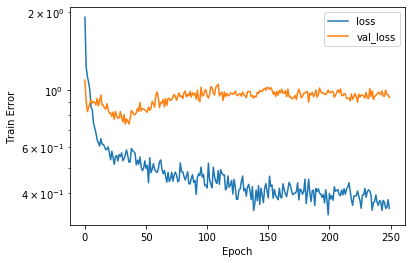

In [39]:
pd.Series(training.history['loss']).plot(logy=True,label='loss')
pd.Series(training.history['val_loss']).plot(logy=True,label='val_loss')
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.legend()

In [34]:
y_hat=np.round(model.predict([test.userid,test.itemid]),decimals=0)
y_true=np.array(test.rating)

In [35]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_true, y_hat)

1.2704918032786885

In [36]:
test['predict_rating']=y_hat

In [40]:
model.save('battery_model.h5')

In [42]:
new_model = keras.models.load_model('battery_model.h5')

In [43]:
new_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
user (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
item_embedding (Embedding)      (None, 1, 5)         200         item[0][0]                       
__________________________________________________________________________________________________
user_embedding (Embedding)      (None, 1, 5)         755         user[0][0]                       
____________________________________________________________________________________________